# **terminal**


In [4]:
from IPython.display import JSON
from google.colab import output
from subprocess import getoutput
import os

def shell(command):
  if command.startswith('cd'):
    path = command.strip().split(maxsplit=1)[1]
    os.chdir(path)
    return JSON([''])
  return JSON([getoutput(command)])
output.register_callback('shell', shell)

In [5]:
#@title Colab Shell
%%html
<div id=term_demo></div>
<script src="https://code.jquery.com/jquery-latest.js"></script>
<script src="https://cdn.jsdelivr.net/npm/jquery.terminal/js/jquery.terminal.min.js"></script>
<link href="https://cdn.jsdelivr.net/npm/jquery.terminal/css/jquery.terminal.min.css" rel="stylesheet"/>
<script>
  $('#term_demo').terminal(async function(command) {
      if (command !== '') {
          try {
              let res = await google.colab.kernel.invokeFunction('shell', [command])
              let out = res.data['application/json'][0]
              this.echo(new String(out))
          } catch(e) {
              this.error(new String(e));
          }
      } else {
          this.echo('');
      }
  }, {
      greetings: 'Welcome to Colab Shell',
      name: 'colab_demo',
      height: 250,
      prompt: 'colab > '
  });

## **explore**

# model

In [6]:
cd /content/drive/My Drive/Colab_Notebooks/flearn/federate-learning

/content/drive/My Drive/Colab_Notebooks/flearn/federate-learning


In [ ]:
from main import run_app
root_path='/content/drive/My Drive/Colab_Notebooks/flearn/federate-learning/data/'
for q in [0,0.5,1]:
  hs_test=run_app(train_dir = root_path+'synthetic/data/train/',
                          test_dir  = root_path+'synthetic/data/test/',
                          configs   ={
                              'layer_sizes': [60, 10], 'act_funcs': ['softmax'],
                              'dataset_name': 'synthetic',
                              'method_name': 'QFedAvgServer',
                          },
                          server_configs = {
                              'num_rounds': 20,
                              'pct_client_per_round': 0.1,
                              'num_epochs': 1,
                              'batch_size': 8,
                              'lr': 0.1,
                              'q': q
                          },
                          return_flag=False)


/bin/bash: line 0: cd: too many arguments
training round : 1
training round : 2
training round : 3
training round : 4
training round : 5
training round : 6
training round : 7
training round : 8
training round : 9
training round : 10
training round : 11
training round : 12
training round : 13
training round : 14
training round : 15
training round : 16
training round : 17
training round : 18
training round : 19
training round : 20


In [ ]:
for q in [0,2.5,5]:
  hs_test=run_app(train_dir = root_path+'adult/data/train/',
                          test_dir  = root_path+'adult/data/test/',
                          configs   ={
                              'layer_sizes': [99, 10], 'act_funcs': ['softmax'],
                              'dataset_name': 'adult',
                              'method_name': 'QFedAvgServer',
                          },
                          server_configs = {
                              'num_rounds': 20,
                              'pct_client_per_round': 1,
                              'num_epochs': 3,
                              'batch_size': 8,
                              'lr': 0.1,
                              'q': q
                          },
                          return_flag=False)


#just comment - don't run these cell


In [ ]:
from flearn.utils import read_data
import torch
import torch.optim as optim
import torch.nn as nn
root_path='/content/drive/My Drive/Colab_Notebooks/flearn_tianli/fair_flearn/data/'
train_dir = root_path+'fmnist/data/train/'
test_dir  = root_path+'fmnist/data/test/'
client_names, groups, train_data, test_data = read_data(train_dir, test_dir, torch.long)

In [ ]:
root_path='/content/drive/My Drive/Colab_Notebooks/flearn_tianli/fair_flearn/data/'
for q in [0,2.5,5]:
  hs_test=run_app(train_dir = root_path+'vehicle/data/train/',
                          test_dir  = root_path+'vehicle/data/test/',
                          configs   ={
                              'layer_sizes': [100, 10], 'act_funcs': ['softmax'],
                              'dataset_name': 'vehicle',
                              'method_name': 'QFedAvgServer',
                          },
                          server_configs = {
                              'num_rounds': 10,
                              'pct_client_per_round': 1,
                              'num_epochs': 1,
                              'batch_size': 8,
                              'lr': 0.1,
                              'q': q
                          },
                          return_flag=False)


In [ ]:
root_path='/content/drive/My Drive/Colab_Notebooks/flearn_tianli/fair_flearn/data/'
for q in [0,2.5,5]:
  hs_test=run_app(train_dir = root_path+'fmnist/data/train/',
                          test_dir  = root_path+'fmnist/data/test/',
                          configs   ={
                              'layer_sizes': [784, 10], 'act_funcs': ['softmax'],
                              'dataset_name': 'fmnist',
                              'method_name': 'QFedAvgServer',
                          },
                          server_configs = {
                              'num_rounds': 20,
                              'pct_client_per_round': 1,
                              'num_epochs': 3,
                              'batch_size': 8,
                              'lr': 0.1,
                              'q': q
                          },
                          return_flag=False)


In [ ]:
for s in [0.1,0.2,0.3]:
  run_app(train_dir = 'data/synthetic/train/',
                        test_dir  = 'data/synthetic/test/',
                        configs   ={
                            'layer_sizes': [60, 10], 'act_funcs': ['softmax'],
                            'dataset_name': 'synthetic',
                            'method_name': 'DL_FedAvgServer',
                        },
                        server_configs = {
                            'num_rounds': 10,
                            'pct_client_per_round': 0.3,
                            'num_epochs': 3,
                            'batch_size': 8,
                            'lr': 0.1,
                            's': s
                        },
                        return_flag=False)


# result evaluation


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from IPython.display import display

def get_metric_datas(data_paths,qs):
  data_train_loss=[]
  data_acc=[]
  for path,q in zip(data_paths,qs):
    pdf=pd.read_pickle(path)
    for r in range(1,21):
      pdf_temp = pdf[pdf['round']==-r]
      data_train_loss.append([q,r,pdf_temp['train_loss/train_acc'].mean(),pdf_temp['train_loss/train_acc'].var()])
      data_acc.append([q,r,pdf_temp['train_acc/test_acc'].mean(),pdf_temp['train_acc/test_acc'].var()])
  pdf_loss = pd.DataFrame(data_train_loss,columns=['q','round','avg_train_acc','variance_train_acc'])
  pdf_acc  = pd.DataFrame(data_acc,columns=['q','round','avg_test_acc','variance_test_acc'])
  return pdf_loss ,pdf_acc

root_path="/content/drive/My Drive/Colab_Notebooks/flearn/federate-learning/experiments/QFedAvgServer"
data_paths=[]
for root, dirs, files in os.walk(root_path):
    for file in files:
        if file.endswith(".pkl"):
             data_paths.append(os.path.join(root, file))

## **synthetic**


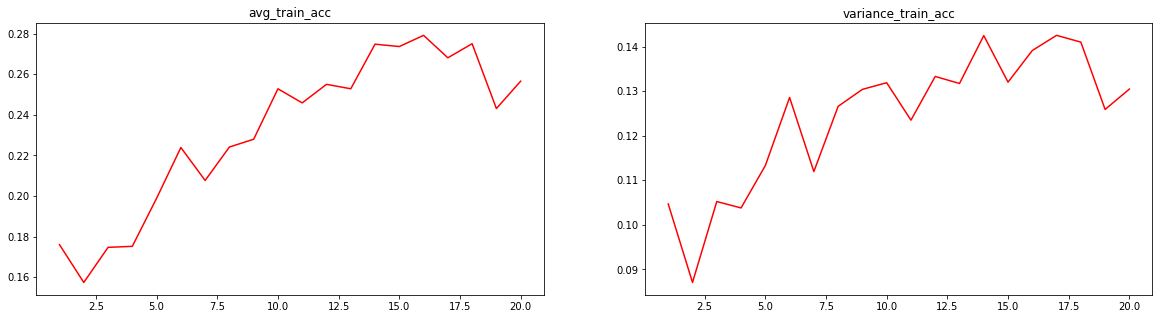

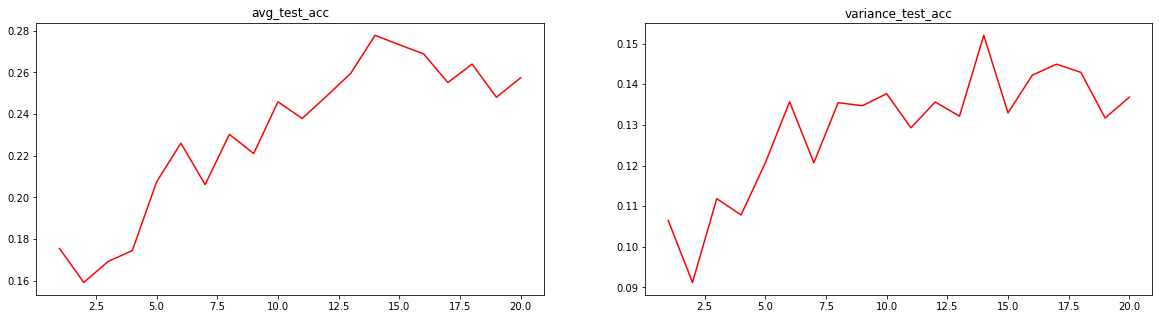

In [ ]:
qs=[0,0.5,1]
syn_data_paths=sorted([path for path in data_paths if 'synthetic' in path])
pdf_loss ,pdf_acc = get_metric_datas(syn_data_paths,qs)
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(20,5))
for q,cl in zip(qs,['r','g','b']):
  ii=pdf_loss['q']==q
  ax1.plot(pdf_loss[ii]['round'],pdf_loss[ii]['avg_train_acc'],color=cl)
  ax1.set_title('avg_train_acc')
  ax2.plot(pdf_loss[ii]['round'],pdf_loss[ii]['variance_train_acc'],color=cl)
  ax2.set_title('variance_train_acc')
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(20,5))
for q,cl in zip(qs,['r','g','b']):
  jj=pdf_acc['q']==q
  ax1.plot(pdf_acc[jj]['round'],pdf_acc[jj]['avg_test_acc'],color=cl)
  ax1.set_title('avg_test_acc')
  ax2.plot(pdf_acc[jj]['round'],pdf_acc[jj]['variance_test_acc'],color=cl)
  ax2.set_title('variance_test_acc')

## adult

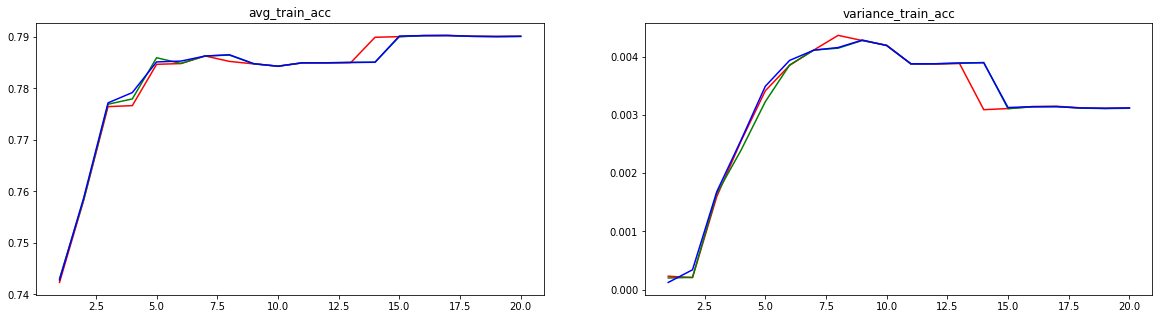

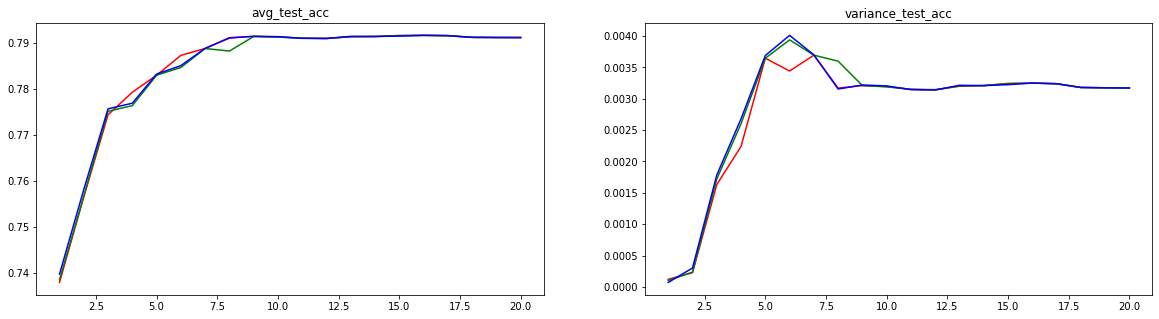

In [ ]:
qs=[0, 0.5, 1]
adult_data_paths=sorted([path for path in data_paths if 'adult' in path])
pdf_loss ,pdf_acc = get_metric_datas(adult_data_paths,qs)
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(20,5))
for q,cl in zip(qs,['r','g','b']):
  ii=pdf_loss['q']==q
  ax1.plot(pdf_loss[ii]['round'],pdf_loss[ii]['avg_train_acc'],color=cl)
  ax1.set_title('avg_train_acc')
  ax2.plot(pdf_loss[ii]['round'],pdf_loss[ii]['variance_train_acc'],color=cl)
  ax2.set_title('variance_train_acc')
fig, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(20,5))
for q,cl in zip(qs,['r','g','b']):
  jj=pdf_acc['q']==q
  ax1.plot(pdf_acc[jj]['round'],pdf_acc[jj]['avg_test_acc'],color=cl)
  ax1.set_title('avg_test_acc')
  ax2.plot(pdf_acc[jj]['round'],pdf_acc[jj]['variance_test_acc'],color=cl)
  ax2.set_title('variance_test_acc')

**problem**
*   Didn't see evident effect of parameter q
*   Wondering about convergence
*   Couldn't handle acc (how piori between acc and fair)


